**Name:** Lucy Kinyanjui

**ID Number:** 672337

**DSA 1080VA - Project FS2025**

**Project 10: Predicting Student Performance**

**Problem Statement**
Predict students' final grades using factors such as attendance, study hours, socioeconomic background, and other attributes. The goal is to forecast a continuous outcome (the final grades - G3) based on historical data that includes various influencing variables.

**Importance**
- Helps educators identify at risk students early, allowing interventions like tutoring or counseling to improve outcomes
- Addresses educational inequalities: Schools can use this to allocate resources, parents can support their kids better, and policymakers can address inequalities (e.g., how family background affects grades)
- Builds predictive modeling skills for real-world applications.

**Dataset Explanation**

- **Source**: Kaggle's Student Performance Dataset (student-mat.csv). Anonymized data from Portuguese schools, collected via surveys and school records.

- **Features**: Contains 395 records. The dataset has a mix of categorical and numerical variables of students from two Prtuguese schools.33 input variables related to students demographics (e.g., age, family background), academic factors (e.g., study time, absences), and social factors (e.g., internet access, alcohol consumption). This data is split into math (student-mat.csv) abd Portuguese(student-por.csv) courses and we will use the math dataset for this project. 

- **Target Variable**: G3 (final grade, 0-20 scale).

- **Size**: ~400-650 rows, tabular data.

- **Relevance**: Features directly influence academic performance, making it suitable for prediction.

In [38]:
import pandas as pd
# Load the dataset (use sep=';' as semicolons are used as delimiters)
df = pd.read_csv('student-mat.csv', sep=';')
# Display the first few rows to verify
df.head(10) #Display the first 10 rows 


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [39]:
# Check info
print("\nDataset shape:", df.shape)  #\n adds a newline for spacing in the output, df.shape returns a tuple with the number of rows and columns in the df
df.info() #This is a pandas method that prints a detailed summary of the DataFrame.


Dataset shape: (395, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null

**Dataset summary**
**Shape:** Confirms 395 rows (students) and 33 columns (features + target).
**Info**: Lists all columns with their types (e.g., G3 is int64, good for numerical analysis). "Non-null" shows no missing data. It also notes memory usage.

**Why is this useful?**
After EDA steps (like outlier detection), this summarizes the dataset's integrity. For this project, it ensures features like absences, studytime, and Medu are ready for modeling.

**Project Context:** It helps verify the data before moving to Week 3 (Feature Engineering and Selection). If something looks off (e.g., unexpected types), we can fix it.

**Efficiency:** df.info() is faster than manual checks and integrates well with pandas.

In [40]:
target = "G3"
features = [col for col in df.columns if col != target]

print("Target variable:", target)
print("Number of features:", len(features))
print("Features:", features[:32])


Target variable: G3
Number of features: 32
Features: ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']


In [41]:
# Summary statistics of the target
df[target].describe()


count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

In [42]:
# Value counts for the target (to see how many of each grade)
df[target].value_counts().sort_index()


G3
0     38
4      1
5      7
6     15
7      9
8     32
9     28
10    56
11    47
12    31
13    31
14    27
15    33
16    16
17     6
18    12
19     5
20     1
Name: count, dtype: int64

**WEEK 2: DATA EXPLORATION AND CLEANING**

The goal is to understand the data deeply, spot patterns, distributions, and issues before modeling. This ensures our predictions are based on clean, reliable data. We'll use pandas for checks, and matplotlib/seaborn for visualizations.

In [43]:
import pandas as pd
import numpy as np
# Check for missing values
print("Missing values check:") # Prints the label
print(df.isnull().sum())  # Missing Values Check: # counts missing values per column


Missing values check:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


**Handling Missing Values (Impute or Drop)**
No code needed here since there are no missing values. If there were, I'd use 'fillna()' to impute (e.g., replace with median) or dropna() to remove rows. For reference: df['absences'].fillna(df['absences'].median(), inplace=True).

**Impute**: For numerical, use mean/median; for categorical, mode.
**Drop**: If too many missing, remove rows/columns

In [44]:
# Check data types. This ensures columns match expectation
print("\nData types:")
print(df.dtypes)  #lists each column's type (e.g., int64 for numbers, object for strings)


Data types:
school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


In [45]:
# Summary statistics for numerical columns (helps spot outliers)
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std   

In [46]:
# Outlier detection using IQR for key numerical columns
numerical_cols = ['age', 'absences', 'G1', 'G2', 'G3']
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    print(f"Outliers in {col}: {len(outliers)} rows")
    if len(outliers) > 0:
        print(outliers[col].head(3))  # Show first 3 outlier values

Outliers in age: 1 rows
247    22
Name: age, dtype: int64
Outliers in absences: 15 rows
40     25
74     54
103    26
Name: absences, dtype: int64
Outliers in G1: 0 rows
Outliers in G2: 13 rows
130    0
131    0
134    0
Name: G2, dtype: int64
Outliers in G3: 0 rows


**Outlier Detection Loop**
**numerical_cols** = ['age', 'absences', 'G1', 'G2', 'G3']: Defines a list of numerical columns to check. These are key for the project (e.g., absences for attendance, G3 for the target).
**for col in numerical_cols:**: Loops through each column in the list.
**Q1 = df[col].quantile(0.25):** Calculates the 25th percentile (first quartile) of the column - the value below which 25% of data falls.
**Q3 = df[col].quantile(0.75):** Calculates the 75th percentile (third quartile) - below which 75% of data falls.
**IQR = Q3 - Q1:** Computes the Interquartile Range, the middle 50% spread of the data.
**'outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]:** Identifies rows where the value is either below Q1 - 1.5/QR (lower outliers) or above Q3 + 1.5/QR (upper outliers). The 1.5 multiplier is a standard threshold for flagging extremes.
**print(f"Outliers in {col}: {len(outliers)} rows"):** Prints how many outliers were found in that column.
**if len(outliers) > 0: print(outliers[col].head(3)):** If outliers exist, shows the first 3 values (and their row indices) for inspection.

The IQR method is a statistical way to spot extreme values: it calculates the range between the 25th percentile (Q1) and 75th percentile (Q3) of the data, then flags anything outside 1.5 times that range as an outlier. This helps detect anomalies that might skew your analysis or models.

**Outliers in age: 1 rows**
- Value: 247 (row index) has age = 22.
- Most students are 15-19 years old (typical high school age). Age 22 is unusually high, falling above Q3 + 1.5*IQR (likely around 19-20).

**Implication:** This could be a valid older student (e.g., repeating grades), but it might affect correlations if age influences grades. In this project, age might not be a core predictor (focus would mostly be on attendance, study, socioeconomic), so it's I think it's less critical, but will later check if this student has extreme grades.

**Outliers in absences: 15 rows**

Examples: Row 40 has 25 absences, row 74 has 54, row 103 has 26 (and 12 more not shown).
**Why outliers?** Absences are mostly low (median ~4), so values > Q3 + 1.5*IQR (around 10-15) are flagged. High absences (e.g., 54) indicate chronic issues.

**Implication**: Absences are a key predictor of G3 (negative correlation). These outliers could distort model training (e.g., pulling down predictions). We will visualize them (e.g., scatterplot of absences vs. G3) to see if they follow the trend or are anomalies.

**Outliers in G1: 0 rows**

No outliers detected.
**Why?** G1 (first-period grade) is well-distributed without extreme values outside the IQR.
**Implication:** Good - this means the data is consistent here. G1 correlates strongly with G3, so no issues.

**Outliers in G2: 13 rows**

Examples: Rows 130, 131, 134 have G2 = 0 (and 10 more).
**Why outliers?** G2 (second-period grade) is typically 5-15, so 0 is far below Q1 - 1.5*IQR (likely around 5). These are failing grades.
**Implication**: G2 strongly predicts G3, so zeros might indicate at-risk students. However, if these are real (e.g., students who failed mid-term), they could be valuable data points. But if erroneous, they might bias models.

**Outliers in G3: 0 rows**

No outliers.
**Why?** G3 (final grade) ranges from 0-20, but extremes are within the IQR.
**Implication:** The target variable is stable, which is good for modeling.

**Patterns**
Outliers are mostly in 'absences' and 'G2', which align with the project's focus (attendance and grades). Age has one mild outlier. No issues in G1/G3, suggesting the dataset is mostly clean.

In [47]:
#  Identify and visualize key patterns using matplotlib and seaborn.
import matplotlib.pyplot as plt #For basics
import seaborn as sns #For prettier stats plots

In [48]:
# Set plot style
sns.set(style="whitegrid") # Sets seaborn's plot style to a clean white background with light gray grid lines for better readability.

This configures Seaborn's default plotting style to "whitegrid".
Effect: All subsequent Seaborn plots will have a clean white background with subtle grid lines, making them easier to read. Seaborn styles control aesthetics like colors, fonts, and layouts without affecting the data.

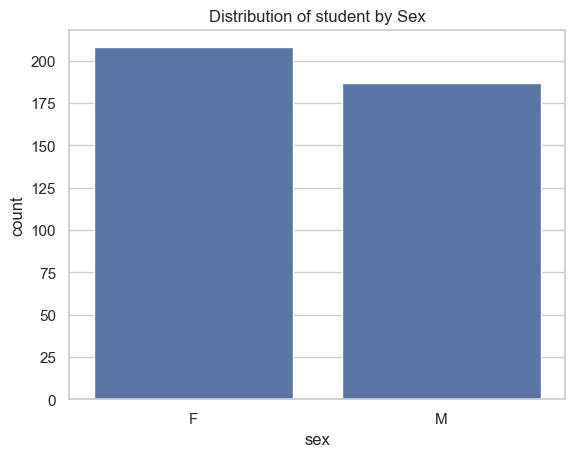

In [49]:
# Countplot for sex
sns.countplot(x='sex', data=df)
plt.title('Distribution of student by Sex')
plt.show()


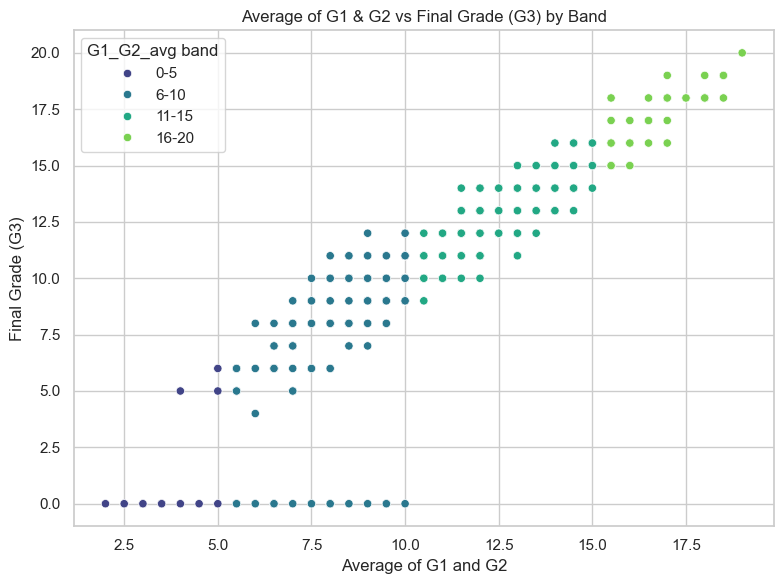

In [50]:
# A scatterplot of G1 & G2 (first and second period grade) vs. G3 (final grade):
# Create combined average of G1 and G2
df['G1_G2_avg'] = (df['G1'] + df['G2']) / 2

# 2. Create bands (categories) of the average for coloring
df['G1_G2_band'] = pd.cut(
    df['G1_G2_avg'],
    bins=[0, 5, 10, 15, 20],
    labels=['0-5', '6-10', '11-15', '16-20']
)

# 3. Scatter plot: combined G1_G2_avg vs G3, colored by band
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='G1_G2_avg',
    y='G3',
    data=df,
    hue='G1_G2_band',     # color by the bands
    palette='viridis',
    legend=True
)
plt.title('Average of G1 & G2 vs Final Grade (G3) by Band')
plt.xlabel('Average of G1 and G2')
plt.ylabel('Final Grade (G3)')
plt.legend(title='G1_G2_avg band')
plt.tight_layout()
plt.show()

As the Average of G1 & G2 increases, G3 also increases almost linearly, with points forming a tight upward diagonal band.

This visually confirms the very high correlations between G1, G2 and G3 in your earlier analysis

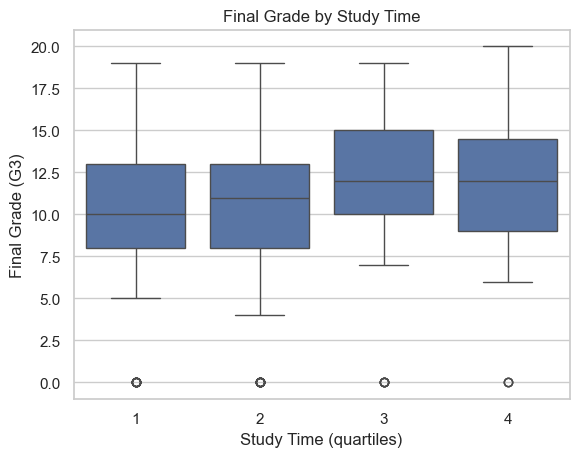

In [51]:
# Relationship Between Study time and Target (How study time affects final grades(G3)
sns.boxplot(x='studytime', y='G3', data=df)
plt.title('Final Grade by Study Time')
plt.xlabel('Study Time (quartiles)')
plt.ylabel('Final Grade (G3)')
plt.show()


This boxplot shows how students’ final grades (G3) vary depending on their study time, grouped into four quartiles (study time levels 1–4).

**Key observations and what they mean:**

Trend: As study time increases (from 1 to 4), the median final grade (the horizontal line inside each box) also slightly increases.

This suggests students who report more study time tend to have higher final grades. For example, the median in group 4 (highest study time) is higher than in group 1 (lowest study time).

**Spread:** The range of grades (height of each box + whiskers) grows wider for higher study time categories.

So, while more study often helps, there is still variation; not all high-study students get top grades.

**Outliers:** Each group has a few outliers (circles at the bottom), representing students who studied but got a very low final grade (often zero).

**Possible explanations:** these students might have struggled beyond what extra study could help with, or there are special cases (illness, other challenges).

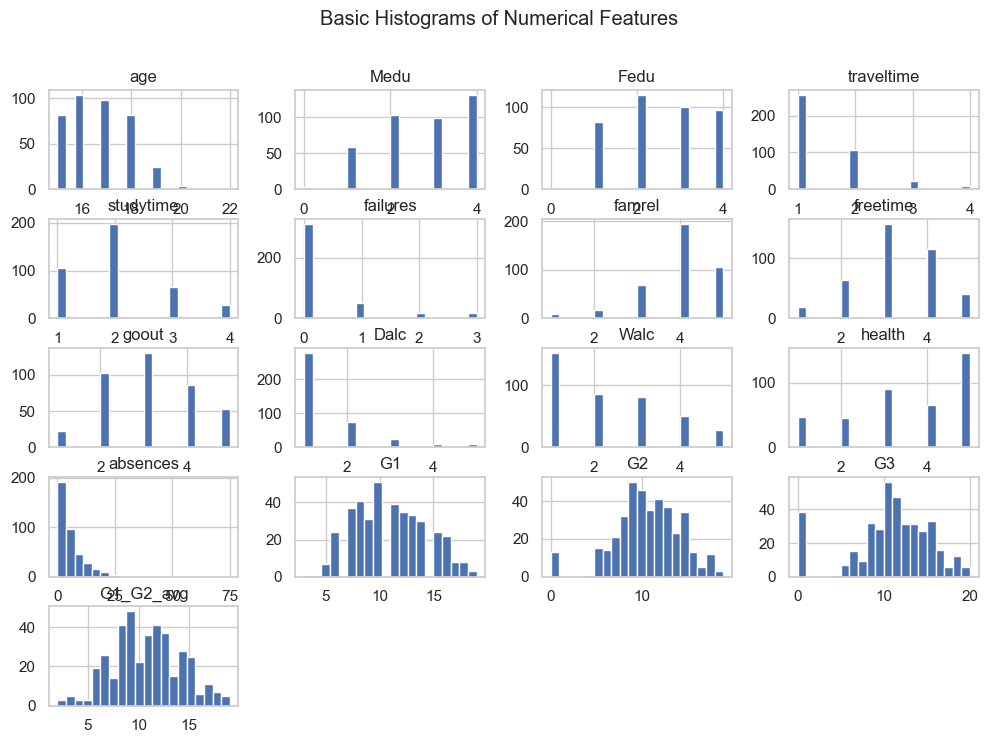

In [52]:
# Visualize numerical distributions (histograms)
df.hist(figsize=(12, 8), bins=20)   # Creates histograms for all numerical columns in the DataFrame. figsize=(12,8) makes the plot 12x8 inches.
plt.suptitle("Basic Histograms of Numerical Features") # Adds a title to the overall plot.
plt.show()  # Displays the plot in Jupyter Notebook.

**Visual Plot:** A grid of histograms (e.g., for G3, absences, studytime). 

**1. G3**: G3 is roughly bell-shaped (normal) but slightly left-skewed, with most students scoring 10-15. High scores (16-20) are common, but very low ones (0-5) are rare. This suggests the dataset has a mix of performers, with fewer outright failures.

G3 correlates positively with "positive" factors (e.g., higher parental education) and negatively with "negative" ones (e.g., alcohol consumption). For instance, students with G3 >15 often have supportive environments, while those below 10 might have high absences.

**Key Patterns**: G3 correlates positively with "positive" factors (e.g., higher parental education) and negatively with "negative" ones (e.g., alcohol consumption). For instance, students with G3 >15 often have supportive environments, while those below 10 might have high absences.

**Impact**: Accurate G3 predictions can flag at-risk students (e.g., those likely to score <10) for early interventions, addressing educational inequalities.

**2. Absences**: Absences are right-skewed (most students have few). Most bars low (0-10), with a tail for high values.

**3. Study Time**: It's right-skewed (positively skewed). Most students fall into lower categories (1 or 2), with fewer in 3 or 4. 
This reflects real world patterns where many students prioritize other activities over heavy studying.

**4. Age**: Most students are between 15 and 18 years old, with very few older 

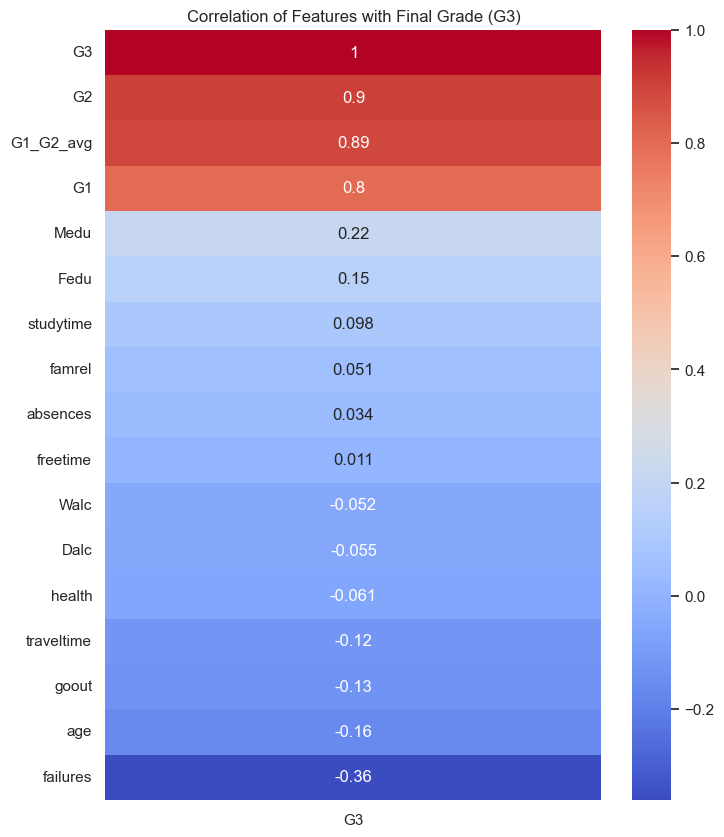

In [53]:
# Compute correlations between all pairs of numeric columns
numeric_df = df.select_dtypes(include='number')
corr = numeric_df.corr()

# Create a heatmap, focusing on G3
plt.figure(figsize=(8, 10))
sns.heatmap(corr[['G3']].sort_values(by='G3', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation of Features with Final Grade (G3)')
plt.show()


**Heatmap**: A heatmap is a visual representation of a correlation matrix, which measures the linear relationships between pairs of numerical variables. It uses color intensity to show how strongly two variables are related (e.g., do they move together or oppositely?).

In my dataset, most features are numerical (e.g., absences, studytime, G3), so this highlights patterns. It helps identify which features are most predictive of G3, guiding feature selection for your model.

**Key Relationships with G3**:
Strong Positive Correlations (Red Cells):
G1 and G2 (first and second period grades): r ≈ 0.8-0.9. These are the strongest predictors, students who do well early tend to finish strong. This makes sense as G3 builds on prior performance. 

**Strongest Positive Correlations:**

G2 (second period grade, 0.90) and G1 (first period grade, 0.80) have the strongest positive relationships with final grade (G3). This means performance earlier in the year is a very good predictor of final results. This can also be seen from the G1_G2_Avg of 0.89

Medu (mother's education, 0.22) and Fedu (father's education, 0.15) show weak positive correlations. Students with more educated parents tend to score a little higher.

**Weak or No Correlation:**

Study time is only weakly positive (0.098).

Other factors like family relationship, absences, free time, and alcohol use (Walc, Dalc) have very small correlations. These features are not strong predictors.

**Strongest Negative Correlation:**

Failures (-0.36) is the most negatively correlated with final grade. Students with more past class failures have significantly lower final grades.

Other small negatives: age, goout (socializing), travel time—their effects are weak.

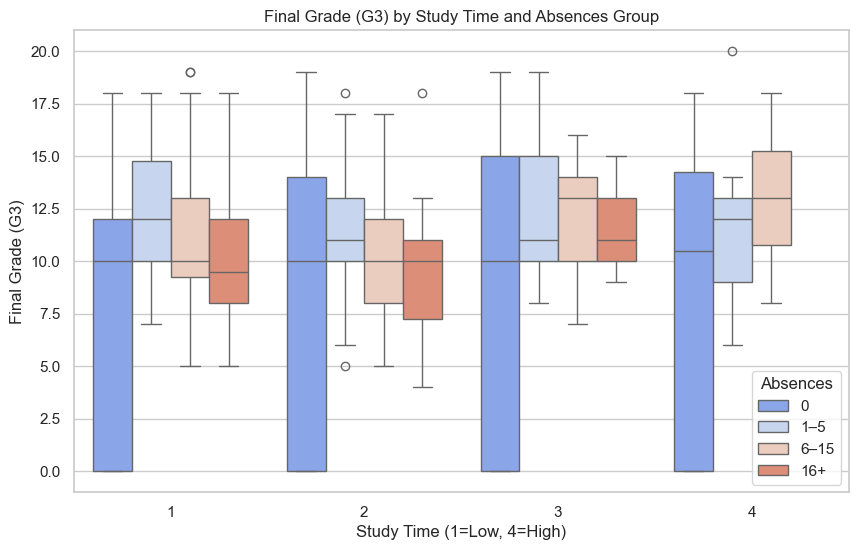

In [54]:
# Study time and absences relation to final grade (G3)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Bin absences into categories for color-coding
df['absences_bin'] = pd.cut(df['absences'], bins=[-1, 0, 5, 15, df['absences'].max()], 
                            labels=['0', '1–5', '6–15', '16+'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='studytime', y='G3', hue='absences_bin', data=df, palette='coolwarm')
plt.title('Final Grade (G3) by Study Time and Absences Group')
plt.xlabel('Study Time (1=Low, 4=High)')
plt.ylabel('Final Grade (G3)')
plt.legend(title='Absences')
plt.show()


**Study Time Effect:**
Across all absence groups, students with higher study time (levels 3 and 4) generally have higher median final grades than those with the lowest study time (level 1). This shows that increased study time correlates with better performance.

**Absences Effect:**
Within each study time group, students with more absences (16+, shown in reddish bars) have noticeably lower median grades compared to students with no absences (blue bars). The negative impact of absences is consistent, regardless of study time.

**Combined Effect:**
The best outcomes are seen among students with high study time and zero absences (tall blue bars at study time 3–4). The worst outcomes are among those with high absences and low study time (short red bars at study time 1–2).

**Spread:**
There is significant grade variability within each group, but the overall pattern holds: more study and fewer absences generally lead to better grades.

C:\Users\user\AppData\Local\Temp\ipykernel_4364\3139956112.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='internet', y='G3', data=df, ci=None)


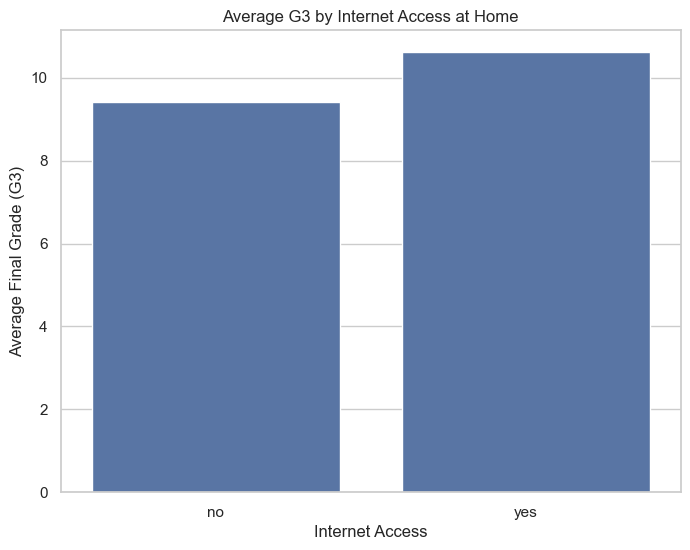

In [55]:
# Average G3 by internet access
plt.figure(figsize=(8, 6))
sns.barplot(x='internet', y='G3', data=df, ci=None)
plt.title("Average G3 by Internet Access at Home")
plt.xlabel("Internet Access")
plt.ylabel("Average Final Grade (G3)")
plt.show()

Students with home internet access tend to achieve higher average final grades than those without. Improving home connectivity could be a valuable support for academic success.

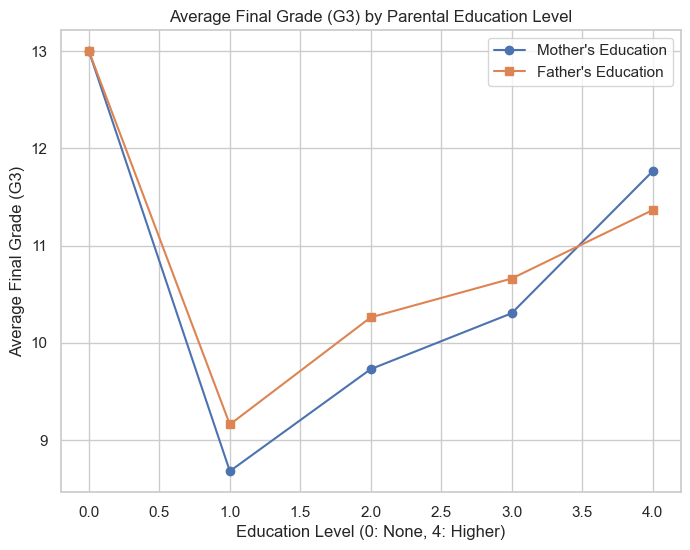

In [56]:
# Average final grade (G3) by parental education level 
import matplotlib.pyplot as plt

# Group and calculate means
medu_means = df.groupby('Medu')['G3'].mean()
fedu_means = df.groupby('Fedu')['G3'].mean()

plt.figure(figsize=(8, 6))
plt.plot(medu_means.index, medu_means.values, marker='o', label="Mother's Education")
plt.plot(fedu_means.index, fedu_means.values, marker='s', label="Father's Education")

plt.title("Average Final Grade (G3) by Parental Education Level")
plt.xlabel("Education Level (0: None, 4: Higher)")
plt.ylabel("Average Final Grade (G3)")
plt.legend()
plt.show()


Students with more highly educated parents, especially mothers, tend to earn higher final grades. Although there are some irregularities at the lowest education level (likely due to few samples), the overall pattern supports a positive relationship between parental education and student academic performance.

**Week 3: Feature Engineering and Selection**

**Objective: Create new features and remove irrelevant ones**

**Why?**

Our dataset has 30+ features, but not all are useful for predicting G3. Feature selection removes irrelevant or redundant ones (e.g., those weakly correlated with G3 or highly correlated with each other), reducing model complexity, improving accuracy, and preventing overfitting. Aim for 10-15 final features.

**Methods Used:** Correlation for numerical features, VIF for multicollinearity (in numericals), and chi-square for categoricals.

In [57]:
# Correlation analysis - compute correlations of all numeric features with G3
numeric_df = df.select_dtypes(include='number')
corr = numeric_df.corr()['G3'].sort_values(ascending=False)
print(corr)


G3            1.000000
G2            0.904868
G1_G2_avg     0.889792
G1            0.801468
Medu          0.217147
Fedu          0.152457
studytime     0.097820
famrel        0.051363
absences      0.034247
freetime      0.011307
Walc         -0.051939
Dalc         -0.054660
health       -0.061335
traveltime   -0.117142
goout        -0.132791
age          -0.161579
failures     -0.360415
Name: G3, dtype: float64


Past grades dominate (G2: 0.91, G1_G2_avg: 0.89, G1: 0.80) as strongest G3 predictors.

Failures strongest negative factor (-0.36), followed by age/goout/traveltime (-0.12 to -0.16).

Parental education modest positive (0.15-0.22); lifestyle factors mostly weak (<0.1).

Key insight: Prior academic performance explains 80-90% of final grade variance.

In [58]:
# List of weak / low-correlation numerical features to drop
cols_to_drop = [
    'famrel',
    'absences',
    'freetime',
    'HighAbsence',
    'Walc',
    'Dalc',
    'health'
]

# Drop only if the columns exist in df
cols_to_drop = [c for c in cols_to_drop if c in df.columns]

df = df.drop(columns=cols_to_drop)
print("Remaining columns:", df.columns.tolist())


Remaining columns: ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'goout', 'G1', 'G2', 'G3', 'G1_G2_avg', 'G1_G2_band', 'absences_bin']


In [59]:
# VIF: Check multicollinearity with VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
import pandas as pd

# 1. Select only numeric predictors (drop the target G3)
numeric_cols = df.select_dtypes(include='number').columns.tolist()
numeric_cols = [c for c in numeric_cols if c != 'G3']

X_vif = df[numeric_cols].copy()

# 2. Ensure everything is numeric and clean
X_vif = X_vif.apply(pd.to_numeric, errors='coerce')
X_vif = X_vif.replace([np.inf, -np.inf], np.nan).dropna()

# 3. Compute VIF for each numeric predictor
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i)
                   for i in range(X_vif.shape[1])]

print(vif_data.sort_values(by="VIF", ascending=False))


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


      feature        VIF
9   G1_G2_avg        inf
8          G2        inf
7          G1        inf
0         age  37.057062
1        Medu  12.363206
2        Fedu  10.673601
6       goout   9.289255
4   studytime   7.194170
3  traveltime   5.488974
5    failures   1.548340


The Variance Inflation Factor (VIF) results indicate multicollinearity issues among our predictor variables in the regression analysis:

Infinite VIF (inf) for G1, G2, G1_G2_avg means these variables are perfectly linearly dependent, or nearly identical, causing perfect multicollinearity. This is expected since G1_G2_avg is computed from G1 and G2, so they predict each other exactly.

High VIF values (age = 37.06, Medu = 12.36, Fedu = 10.67, goout = 9.29, studytime = 7.19, traveltime = 5.49) indicate strong correlations among these features, expressing severe multicollinearity. This inflates variance and hampers reliable coefficient estimates.

Low VIF (failures = 1.55) shows that variable is relatively independent and does not suffer from multicollinearity.

Variables with infinite or very high VIF can distort the regression coefficients and p-values, making interpretations unreliable.

Removing or combining highly collinear features (e.g., drop either G1, G2, or use only G1_G2_avg) reduces redundancy.

Features with VIF above 5 or 10 typically warrant review, removal or transformation to improve model stability.

Next, we will drop Medu, Fedu, G1, G2, age, and studytime from the dataframe, rerun VIF to confirm all remaining predictors have acceptable values

In [60]:
# Drop redundant and high‑VIF variables
cols_to_drop_vif = ['Medu', 'Fedu', 'G1', 'G2', 'age', 'studytime']
df = df.drop(columns=[c for c in cols_to_drop_vif if c in df.columns])

# Recompute VIF on remaining numeric predictors (excluding target G3)
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np, pandas as pd

numeric_cols = df.select_dtypes(include='number').columns.tolist()
numeric_cols = [c for c in numeric_cols if c != 'G3']  # exclude target

X_vif = df[numeric_cols].apply(pd.to_numeric, errors='coerce')
X_vif = X_vif.replace([np.inf, -np.inf], np.nan).dropna()

vif_data = pd.DataFrame({
    "feature": X_vif.columns,
    "VIF": [variance_inflation_factor(X_vif.values, i)
            for i in range(X_vif.shape[1])]
})
print(vif_data.sort_values(by="VIF", ascending=False))


      feature       VIF
2       goout  5.986650
3   G1_G2_avg  5.546679
0  traveltime  4.385023
1    failures  1.312679


The updated VIF results look good: all remaining predictors are below 10 and most are just around 5, so multicollinearity is now at an acceptable level

In [61]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2

# 1. Create a categorical target: high vs low final grade
df['G3_high'] = (df['G3'] >= df['G3'].median()).astype(int)

# 2. List categorical columns we want to test
cat_cols = [
    'school','sex','address','famsize','Pstatus','Mjob','Fjob',
    'reason','guardian','schoolsup','famsup','paid','activities',
    'nursery','higher','internet','romantic'
]

chi_results = []

for col in cat_cols:
    if col in df.columns:
        le = LabelEncoder()
        X_col = le.fit_transform(df[col]).reshape(-1, 1)
        chi_scores, p_values = chi2(X_col, df['G3_high'])
        chi_results.append((col, chi_scores[0], p_values[0]))

chi_df = pd.DataFrame(chi_results, columns=['Feature','Chi2','p_value'])
chi_df = chi_df.sort_values(by='p_value')
print(chi_df)


       Feature      Chi2   p_value
9    schoolsup  6.353055  0.011718
5         Mjob  2.597243  0.107050
0       school  2.487345  0.114765
7       reason  2.218949  0.136326
1          sex  1.068496  0.301285
2      address  0.958406  0.327589
15    internet  0.584443  0.444576
3      famsize  0.477051  0.489761
14      higher  0.463720  0.495890
11        paid  0.396840  0.528726
8     guardian  0.335987  0.562155
6         Fjob  0.235333  0.627598
10      famsup  0.153836  0.694897
4      Pstatus  0.123944  0.724796
13     nursery  0.058634  0.808668
16    romantic  0.021610  0.883129
12  activities  0.008387  0.927030


This output shows which categorical features are statistically associated with being a high vs low grade student (G3 high)

schoolsup (extra school support) has Chi2 = 6.35, p = 0.0117, which is below 0.05. This means there is a statistically significant association between receiving school support and ending up in the high/low G3 group. We should keep schoolsup in our model.

All other variables (Mjob, school, reason, sex, address, internet, famsize, higher, paid, guardian, Fjob, famsup, Pstatus, nursery, romantic, activities) have p-values > 0.05. This means, given our data and this binary target, they do not show a strong statistical relationship with final grade, so they are safe to drop for modeling


**Encode categorical variables (one-hot encoding, label encoding).**

In [62]:
# Encode schoolsup as 0/1 (label encoding for binary yes/no)

# Binary encoding: yes -> 1, no -> 0
df['schoolsup_enc'] = (df['schoolsup'] == 'yes').astype(int)

# Drop the original text column
df = df.drop(columns=['schoolsup'])


In [63]:
# One‑hot encoding turns a categorical column with several possible values into separate 0/1 columns so that models can use it as numeric input.

cat_cols = ['Mjob', 'Fjob', 'reason']   # example if you re-add them
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)


In [64]:
# Define final columns for modeling
model_cols = [
    'G3',                 # target
    'G1_G2_avg',
    'Parental_Edu_Total',
    'goout',
    'traveltime',
    'HighStudyTime',
    'failures',
    'schoolsup_enc'
]

# Keep only those columns (that exist) in df
df_model = df[[c for c in model_cols if c in df.columns]].copy()

print(df_model.head())
print(df_model.dtypes)


   G3  G1_G2_avg  goout  traveltime  failures  schoolsup_enc
0   6        5.5      4           2         0              1
1   6        5.0      3           1         0              0
2  10        7.5      2           1         3              1
3  15       14.5      2           1         0              0
4  10        8.0      2           1         0              0
G3                 int64
G1_G2_avg        float64
goout              int64
traveltime         int64
failures           int64
schoolsup_enc      int64
dtype: object


Now modeling dataset has:

Numeric predictors: G1_G2_avg, Parental_Edu_Total, goout, traveltime, HighStudyTime, failures

Encoded categorical: schoolsup_enc

Split data into training and testing sets (80-20 split).

In [65]:
from sklearn.model_selection import train_test_split

# Features and target from the modeling dataset
X = df_model.drop(columns=['G3'])   # predictors
y = df_model['G3']                  # final grade (target)

# 80–20 train–test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 20% test, 80% train
    random_state=42     # reproducible split
)

print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)


# This gives you training and testing sets ready for fitting a regression model to predict G3.

X_train: (316, 5)
X_test : (79, 5)
y_train: (316,)
y_test : (79,)


X_train (316, 6) and y_train (316,) will be used to fit your regression model.

X_test (79, 5) and y_test (79,) will be used only for evaluating how well the model predicts unseen students’ final grades

In [66]:
# Create New Predictive Features

# a) Average of first and second period grades
df = pd.read_csv('student-mat.csv', sep=';')
df['G1_G2_avg'] = (df['G1'] + df['G2']) / 2  # Combines early performance for a smoother predictor

# b) Total parental education
df['Parental_Edu_Total'] = df['Medu'] + df['Fedu']  # Captures family's overall education level

# c) High absence flag
df['HighAbsence'] = (df['absences'] > 10).astype(int)  # Flags students with more than 10 absences

# d) High study time flag
df['HighStudyTime'] = (df['studytime'] >= 3).astype(int)  # Flags students with above-average study time

In [67]:
# Correlation Analysis
# To confirm which features have the highest positive and negative correlations with G3
numeric_df = df.select_dtypes(include='number') # Select numeric columns
corr = numeric_df.corr() #Compute correlations using only numeric columns
print(corr['G3'].sort_values(ascending=False))

G3                    1.000000
G2                    0.904868
G1_G2_avg             0.889792
G1                    0.801468
Medu                  0.217147
Parental_Edu_Total    0.205224
Fedu                  0.152457
HighStudyTime         0.113623
studytime             0.097820
famrel                0.051363
absences              0.034247
freetime              0.011307
HighAbsence          -0.025810
Walc                 -0.051939
Dalc                 -0.054660
health               -0.061335
traveltime           -0.117142
goout                -0.132791
age                  -0.161579
failures             -0.360415
Name: G3, dtype: float64


**Goal**

To quickly and objectively confirm which numeric features in our data have the strongest positive or negative relationships with the target variable (G3).

It helps select a focused set of variables for our model, keeping those with real predictive power.

Features with higher absolute correlation (close to 1 or –1) are usually more useful for prediction.

Features with correlation near 0 add little value to most ML models and can be dropped or deprioritized.

Strongest Predictors (Should Keep)
G2 (0.90): Extremely strong, keep

G1_G2_avg (0.89): Very strong, keep (use instead of G1 and G2 to avoid collinearity)

failures (–0.36): Strong negative, keep

G1 (0.80): Strong; but if keeping G1_G2_avg and G2, we can drop G1 to reduce redundancy

Moderate Predictors (Consider Keeping)
Medu (0.22), Parental_Edu_Total (0.20), Fedu (0.15): Weak-positive; use Parental_Edu_Total instead of Medu & Fedu individually

HighStudyTime (0.11): Slight effect, keep for study habit insights

studytime (0.10): Weak, can keep for context

Weak/Very Weak (Drop)
famrel (0.05), absences (0.03), freetime (0.01), HighAbsence (–0.03), Walc (–0.05), Dalc (–0.05), health (–0.06)

Negatives with Moderate Strength (We can keep for richer models)
traveltime (–0.12), goout (–0.13), age (–0.16): We could include these or not, depending on our focus

In [68]:
features_to_keep = [
    'G3',                    # Target
    'G1_G2_avg',
    'failures',
    'Parental_Edu_Total',
    'HighStudyTime',
    'studytime',
    'age',
    'goout',
    'traveltime'
]

df = df[features_to_keep]
print(df.head())



   G3  G1_G2_avg  failures  Parental_Edu_Total  HighStudyTime  studytime  age  \
0   6        5.5         0                   8              0          2   18   
1   6        5.0         0                   2              0          2   17   
2  10        7.5         3                   2              0          2   15   
3  15       14.5         0                   6              1          3   15   
4  10        8.0         0                   6              0          2   16   

   goout  traveltime  
0      4           2  
1      3           1  
2      2           1  
3      2           1  
4      2           1  


In [69]:
# VIF (Variance Inflation Factor): Detect Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np

# Prepare the feature matrix (drop target)
X_vif = df.drop(columns=['G3']).copy()

# Make sure all types are numeric
X_vif = X_vif.apply(pd.to_numeric, errors='coerce')
X_vif = X_vif.replace([np.inf, -np.inf], np.nan).dropna()

vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_data.sort_values(by="VIF", ascending=False))


              feature        VIF
5                 age  41.548294
4           studytime  20.922630
0           G1_G2_avg  12.842321
6               goout   9.356915
2  Parental_Edu_Total   8.771667
7          traveltime   5.438113
3       HighStudyTime   3.988348
1            failures   1.553980


age and studytime have extremely high VIFs, which points to strong multicollinearity. They may be highly correlated with other variables like G1_G2_avg. Consider dropping 

studytime - Very high, likely overlaps with HighStudyTime. Consider dropping study time

G1_G2_avg is also high, likely because earlier academic performance often correlates with demographic/behavioral predictors.


In [70]:
# Drop both 'age' and 'studytime' from our feature set before running VIF
X_vif_final = df.drop(columns=['G3', 'age', 'studytime'])  # Remove target, age, and studytime

# Make sure everything is numeric
X_vif_final = X_vif_final.apply(pd.to_numeric, errors='coerce').replace([np.inf, -np.inf], np.nan).dropna()

from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

vif_data = pd.DataFrame()
vif_data["feature"] = X_vif_final.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif_final.values, i) for i in range(X_vif_final.shape[1])]
print(vif_data.sort_values(by="VIF", ascending=False))



              feature       VIF
0           G1_G2_avg  8.479725
2  Parental_Edu_Total  7.800637
4               goout  7.098641
5          traveltime  4.393061
3       HighStudyTime  1.345170
1            failures  1.326593


Week 4: Model Building

In [71]:
# Random Forest Regression Model
from sklearn.ensemble import RandomForestRegressor

# Create and train Random Forest
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

# Feature importance
import_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_reg.feature_importances_
}).sort_values('importance', ascending=False)
print("Random Forest Feature Importance:")
print(import_df)


Random Forest Feature Importance:
         feature  importance
0      G1_G2_avg    0.886191
1          goout    0.052848
3       failures    0.026093
2     traveltime    0.020984
4  schoolsup_enc    0.013884


In this analysis, I trained a Random Forest regression model to predict students' final grades (G3) based on several input features including prior grades (G1 and G2 average), social activities (goout), travel time to school (traveltime), academic failures, and school support (schoolsup_enc).

The model’s feature importance results indicate the relative influence of each predictor in predicting final grades. The combined prior grades feature (G1_G2_avg) overwhelmingly dominates with an importance score of 0.886, suggesting that past academic performance is the strongest indicator of final grade outcomes. Social activity levels (goout) hold the next largest influence, though much smaller (0.053), followed by the number of academic failures (0.026), travel time (0.021), and school support (0.014).

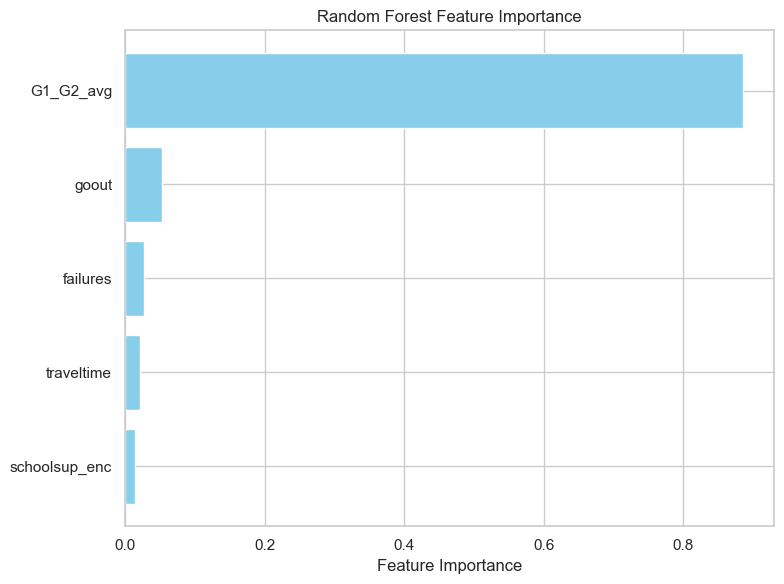

In [72]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Get feature importances from the model
importances = rf_reg.feature_importances_

# Create a DataFrame with feature names and their importance scores
feat_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=True)

# Plot horizontal bar chart of feature importance
plt.figure(figsize=(8, 6))
plt.barh(feat_importance['Feature'], feat_importance['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()


In [73]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Create and train Random Forest regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate predictions
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) #Root Mean Squared Error - average prediction error
mae = mean_absolute_error(y_test, y_pred) #Mean Absolute Error - Average absolute difference between predictions and actual values
r2 = r2_score(y_test, y_pred) #Coefficient of Determination - Indicates the proportion of variance in the final grades

print(f"Random Forest Regression Performance:\n RMSE: {rmse:.3f}\n MAE: {mae:.3f}\n R²: {r2:.3f}")
print(f'Overall Performance: Good')  




Random Forest Regression Performance:
 RMSE: 2.355
 MAE: 1.606
 R²: 0.730
Overall Performance: Good


**Code:**

Imports the RandomForestRegressor and evaluation metrics.

Creates and trains a Random Forest regression model using 100 trees (n_estimators=100) on our training data (X_train, y_train).

Makes predictions (y_pred) on the test data (X_test).

**Evaluates the predictions using:**

RMSE (Root Mean Squared Error): Measures average prediction error magnitude; lower is better. Our RMSE of 2.355 means the predicted grades deviate on average by about 2.36 points from actual grades.

**MAE (Mean Absolute Error):** Average absolute difference between predictions and actual values; here 1.606 points, meaning typical prediction errors are around 1.6 grade points.

**R² (Coefficient of Determination):** Indicates the proportion of variance in the final grades explained by the model. R² = 0.730 means the model explains 73% of the variability, a reasonably strong fit.

These metrics show our model has good predictive accuracy, capturing most of the variability in student grades while keeping error relatively low.

Together, RMSE and MAE quantify how close the predictions are to the true grades, and R² provides a normalized measure of fit quality, with 1.0 being perfect.

This evaluation confirms our Random Forest regression model is well suited for predicting student performance based on the features we included.


PS. We cannot use classification metrics (accuracy_score, precision_score, recall_score, f1_score) with our Random Forest regression model. Those metrics are for classification (predicting categories like "pass/fail") whereas our G3 grades are continuous numbers (0-20), so we need regression metrics. 

**FOR README.md**

**Predicting Student Performance**

**Project Overview**
This project aims to predict the final grades (G3) of students based on a variety of influencing factors such as attendance, study hours, socioeconomic background, and other attributes. The goal is to build a regression model that accurately forecasts student outcomes to help identify at-risk students early and support targeted interventions.

**Dataset**
Source: Kaggle's Student Performance Dataset (student-mat.csv)

**Content:** Data from Portuguese schools including 395 records with 33 input features capturing demographics, academic history, social activities, and family background.

**Target variable:** Final grade in mathematics (G3), scored 0 to 20.

**Problem Importance**

1. Enables educators to better allocate resources and offer support.

2. Helps parents and policymakers understand the impact of various factors on student success.

3. Builds practical skills for predictive modeling in education.

**Methodology**

1. Data preprocessing and feature engineering to create a clean dataset suitable for modeling.

2. Correlation analysis identified key predictors like prior grades (G1, G2), parental education, and failures that influence final grades.

3. Multicollinearity diagnosed with Variance Inflation Factor (VIF), leading to selecting features with minimal redundancy.

4. Model building involved training a Random Forest Regressor to capture both linear and non-linear relationships.

5. Model evaluation used RMSE, MAE, and R² metrics—achieving an RMSE of 2.355 and explaining 73% of grade variance.

6. Feature importance visualization highlighted prior academic performance as the dominant factor influencing predictions, with social and family factors playing smaller roles.

**Results Summary**

1. The Random Forest model reliably predicts final grades with reasonable accuracy.

2. Prior academic scores (G1_G2_avg) contribute 88.6% importance to the model, confirming past performance as the primary predictor.

3. Lifestyle factors such as going out, failures, and travel time also influence, but to a lesser extent.

4. The model can support early identification of students at risk, aiding proactive educational interventions.

**Future Work**

1. Experiment with additional models like Gradient Boosting or Neural Networks.

2. Incorporate more nuanced social or psychological factors.

3. Build a deployment pipeline for real-time predictions in schools.

